## Image Segmentation Using K means

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

c:\users\welcome\envs\opencv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\welcome\envs\opencv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
from PIL import Image
import random

### Black and White color mode

In [7]:
def black_and_white_mode():
    colors = [(0,0,0),(255,255,255)]
    return colors

### Randomly initialize the color

In [8]:
def color_mode(bit,shape):
    color_min = 0
    color_max = 255
    colors = []
    for i in range(0,shape[0]):
        colors.append((random.randint(color_min,color_max),random.randint(color_min,color_max),random.randint(color_min,color_max)))
    return colors

### Image Segmentation From Centers using Kmeans Cluster

In [14]:
img = Image.open('image1.jpg')

In [17]:
imgd = np.array(img)

In [19]:
imgd.shape

(1080, 1920, 3)

In [22]:
def segmented_image_portions_bw(original_image,centers,labels,inverted=False):
    image = original_image
    original_shape = image.shape
    # ## shaping the array of image into 2 dimensional space
    image = image.reshape((image.shape[0] * image.shape[1], image.shape[2]))
    
    # # if color was inverted
    if(inverted):
        seg = (0,0,0)
        rest = (255,255,255)
    else:
        seg = (255,255,255)
        rest = (0,0,0)

    for i in range(0,image.shape[0]):
        image[i,:] = rest

    centers_count = centers.shape[0]

    seg_portions = [image for i in range(0,centers_count)]
    seg_portions = np.array(seg_portions)


    for i in range(0,image.shape[0]):
        cluster_no = labels[i]
        seg_portions[cluster_no][i,:] = seg

    return seg_portions

In [21]:
def segmented_image_portions(original_image,centers,labels):
    image = original_image
    original_shape = image.shape
    image = image.reshape((image.shape[0] * image.shape[1], image.shape[2]))

    for i in range(0,image.shape[0]):
        image[i,:] = (0,0,0)

    centers_count = centers.shape[0]

    seg_portions = [image for i in range(0,centers_count)]
    seg_portions = np.array(seg_portions)


    for i in range(0,image.shape[0]):
        cluster_no = labels[i]
        seg_portions[cluster_no][i,:] = centers[cluster_no]

    return seg_portions

### Implementing K means Clustering for image segmentation

In [33]:
# Providing default k count , image path and initial center
def kmeans_seg(cluster_count=12,init_centers=None,image_path='image1.jpg'):
  
    # Extract pixel data from image
    image = Image.open(image_path)
    original_image = np.array(img)
    image = np.array(img)

    # Plot original Image
    plt.figure()
    plt.axis("off")
    plt.title("Original Image")
    plt.imshow(image)

    print("original shape: " + str(image.shape))

    # Reshape image 
    original_shape = image.shape
    image = image.reshape((image.shape[0] * image.shape[1], image.shape[2]))

    print("converted shape: " + str(image.shape))

    # cluster_count = 2 for B&W mode
    # cluster_count > 2 for color mode

    if init_centers is None:
        kmeans = KMeans(n_clusters=cluster_count)
    else:
        kmeans = KMeans(n_clusters=cluster_count,init=init_centers)

    # main kmeans algo  
    kmeans = KMeans(n_clusters=cluster_count)
    kmeans.fit(image)
    labels = kmeans.predict(image)

    kmeans_centers = kmeans.cluster_centers_  

    print("centers: " + str(kmeans_centers))

    # colors = color_mode(cluster_count,centers.shape)
    # colors = black_and_white_mode()

    colors = kmeans_centers

    # assign color of their respective cluster center for each pixel 
    for i in range(0,image.shape[0]):
        cluster_no = labels[i]
        image[i,:] = colors[cluster_no]

    # convert back to original shape
    kmeans_seg_image = image.reshape(original_shape)

    # Plot segmented image
    plt.figure()
    plt.axis("off")
    plt.title("Quantized Image")
    # plt.gray()
    plt.imshow(kmeans_seg_image)

    segmented_portion_color_inverted = False

    # Extract segment data in color and B/W for every segment
    segmented_portions_kmeans = segmented_image_portions(original_image,kmeans_centers,labels)

    segmented_portions_kmeans = np.reshape(segmented_portions_kmeans,(segmented_portions_kmeans.shape[0],)+ original_shape)

    segmented_portions_bw_kmeans = segmented_image_portions_bw(original_image,kmeans_centers,labels,segmented_portion_color_inverted)

    segmented_portions_bw_kmeans = np.reshape(segmented_portions_bw_kmeans,(segmented_portions_bw_kmeans.shape[0],)+ original_shape)

    # plot segmented portions
    for i in range(0,segmented_portions_kmeans.shape[0]):
        f = plt.figure()
        f.set_figheight(18)
        f.set_figwidth(17.6)
        f.add_subplot(1,2, 1)
        plt.axis("off")
        plt.title("Segmented Portion: "+ str(i+1))
        plt.imshow(segmented_portions_kmeans[i])
        f.add_subplot(1,2, 2)
        plt.axis("off")
        plt.title("Segmented Portion B&W: "+ str(i+1))
        if(segmented_portion_color_inverted):
            black_patch = mpatches.Patch(color='black', label='Segemented Portion')
            white_patch = mpatches.Patch(color='white', label='Rest of the Image')
            legend = plt.legend(handles=[black_patch,white_patch],loc=9,shadow=False,frameon=True,bbox_to_anchor=(0.5, -0.1), ncol=2)
        else:
            white_patch = mpatches.Patch(color='white', label='Segemented Portion')
            black_patch = mpatches.Patch(color='black', label='Rest of the Image')
            legend = plt.legend(handles=[white_patch,black_patch],loc=9,shadow=False,frameon=True,bbox_to_anchor=(0.5, -0.1), ncol=2)  
        frame = legend.get_frame()
        frame.set_facecolor('#EEEEEE')
        frame.set_edgecolor('black')
        plt.imshow(segmented_portions_bw_kmeans[i])

    return kmeans_seg_image,colors

### Running Image Segmentation with K means Cluster technique

original shape: (1080, 1920, 3)
converted shape: (2073600, 3)
centers: [[ 45.87810345  38.52693002  30.51741766]
 [173.96844521 157.81905475 120.03400079]]


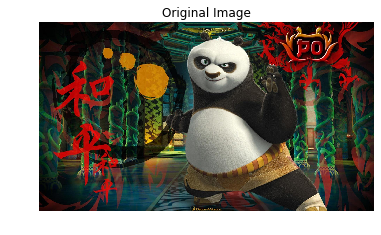

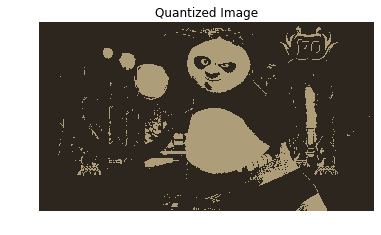

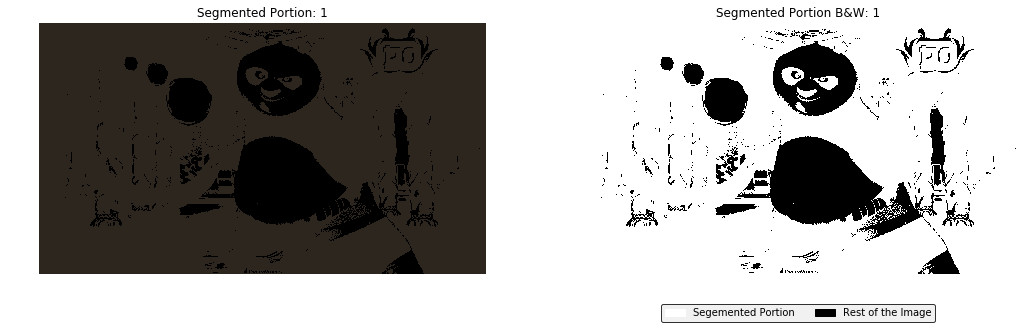

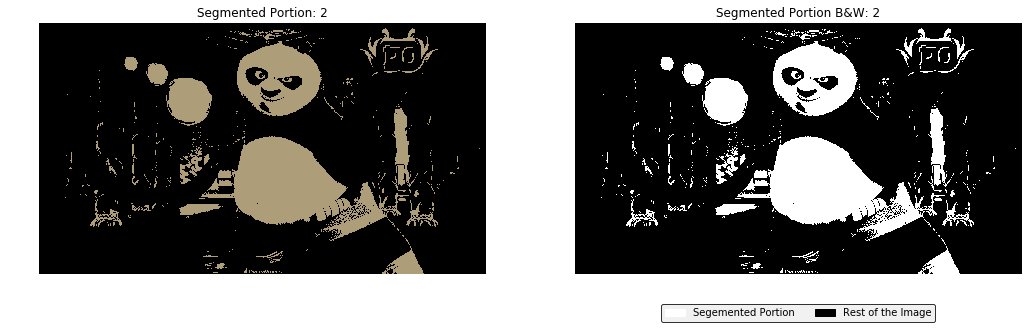

In [34]:
kmeans_seg_image,kmeans_centers = kmeans_seg(cluster_count=2)

original shape: (1080, 1920, 3)
converted shape: (2073600, 3)
centers: [[ 21.80870944  24.0529842   21.0763945 ]
 [137.98705533 131.69368991  98.10497771]
 [167.45453954  44.22986492  16.21394087]
 [ 54.91278281  69.09116649  51.69755151]
 [218.20423297 214.62497832 195.38600461]]
Wall time: 1min 13s


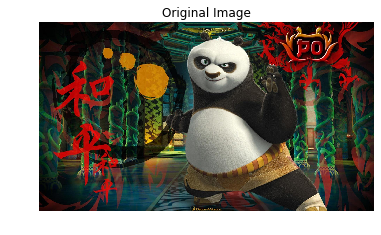

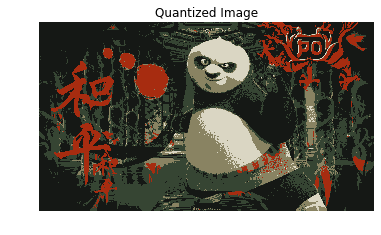

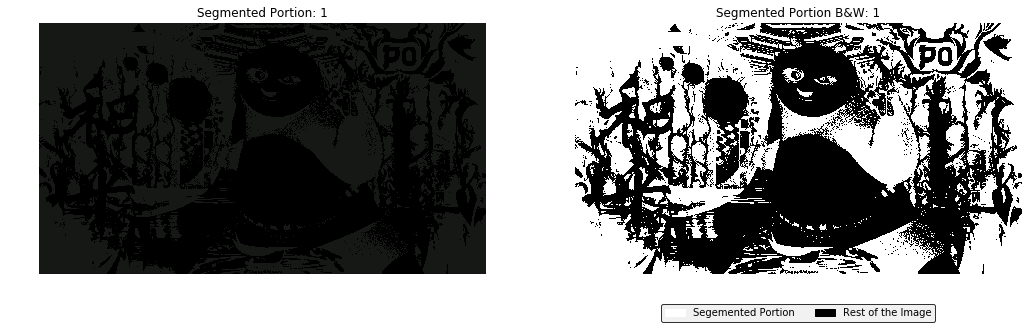

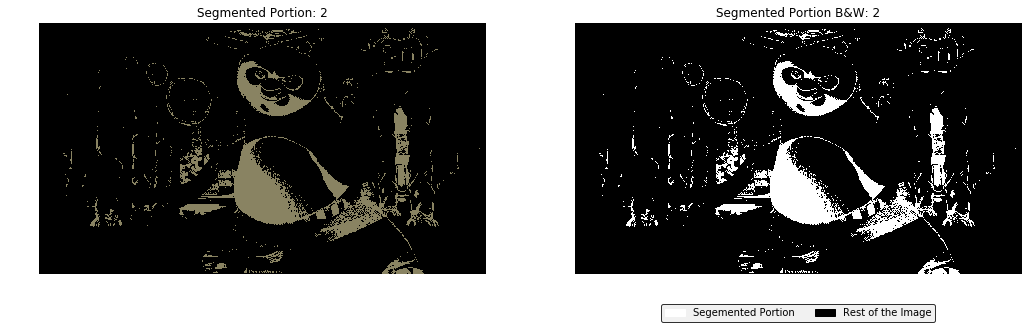

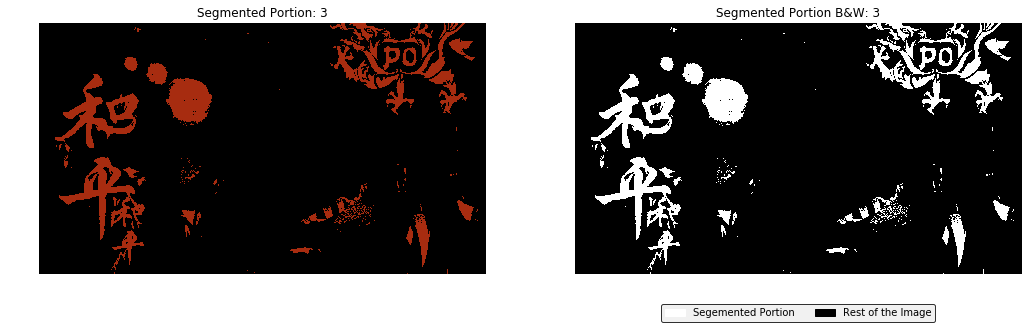

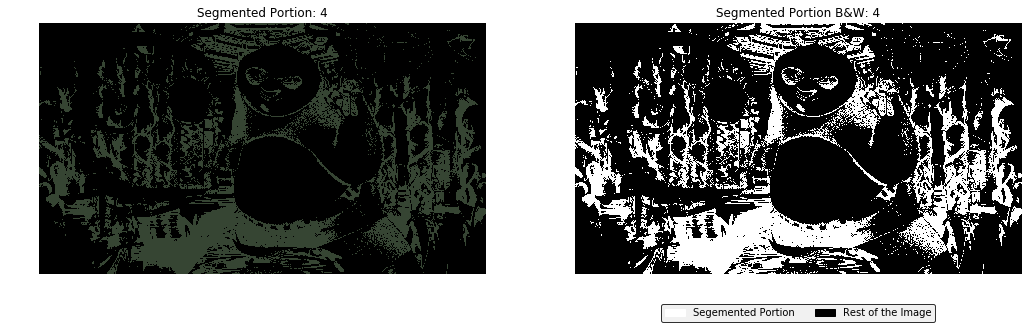

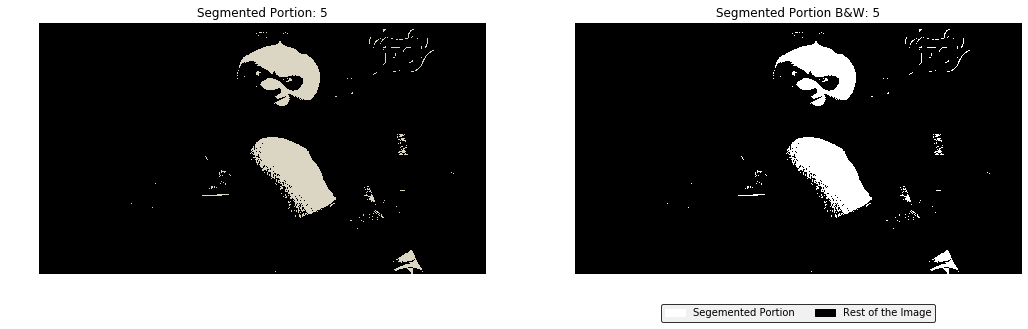

In [36]:
%%time
kmeans_seg_image,kmeans_centers = kmeans_seg(cluster_count=5)

original shape: (1080, 1920, 3)
converted shape: (2073600, 3)
centers: [[ 12.74052864  38.1288418   34.80935978]
 [153.22843572 112.92743566  55.93550661]
 [238.46945873 236.14654154 217.95580625]
 [ 54.22296079  47.24040156  35.00758421]
 [186.29680766  13.71837789  10.81171749]
 [113.17328704 120.16206709 106.08046237]
 [ 23.21409887  69.69725654  61.84480919]
 [111.57920714  29.05732907  22.73297054]
 [  9.07646915  11.11009701  10.02706372]
 [196.02812589 126.53670357  13.48846169]
 [ 33.56753815  24.92508349  21.08297371]
 [200.58235121 196.72814982 178.39968624]
 [168.40351305 160.06656908 131.58684232]
 [ 45.46004734 111.44477092  78.20319132]
 [ 87.76165111  77.12249812  49.93692675]]
Wall time: 6min 6s


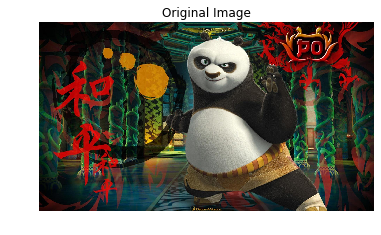

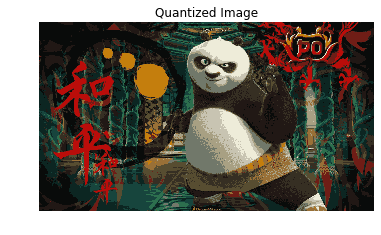

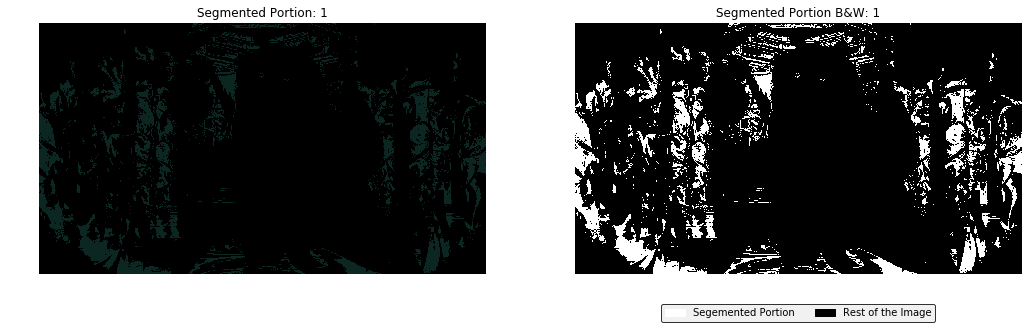

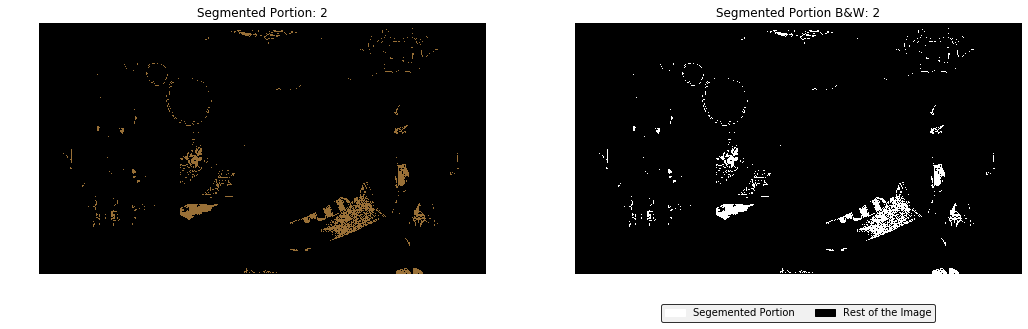

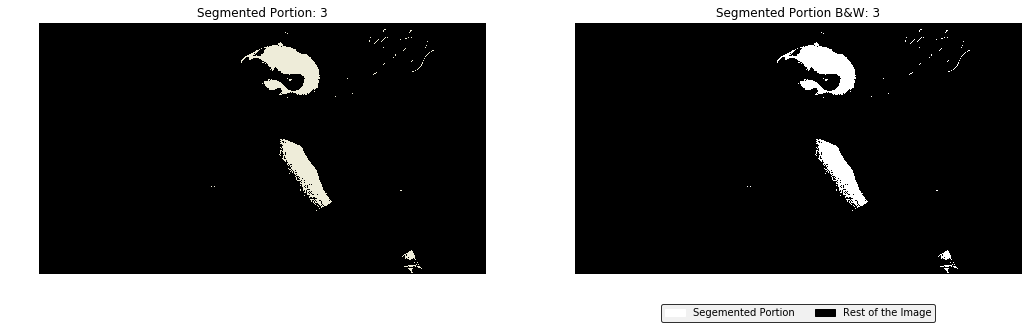

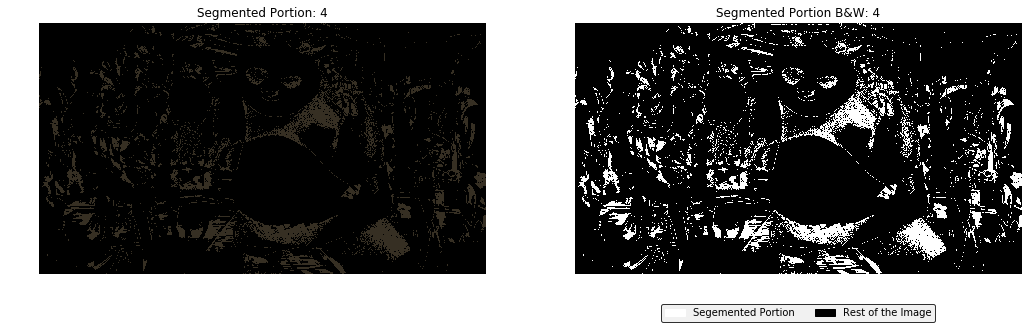

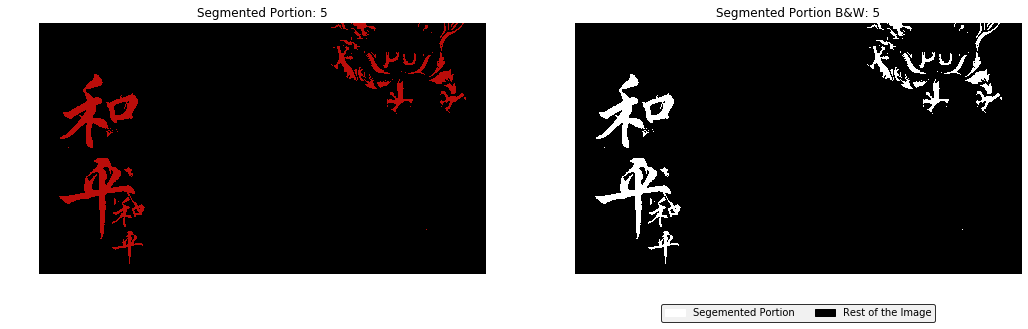

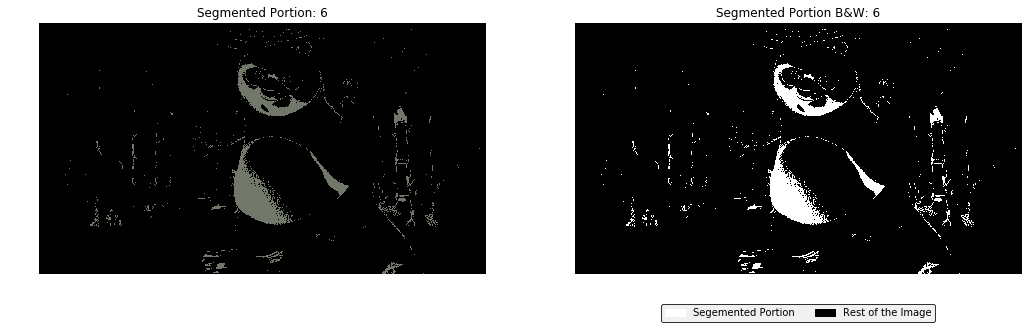

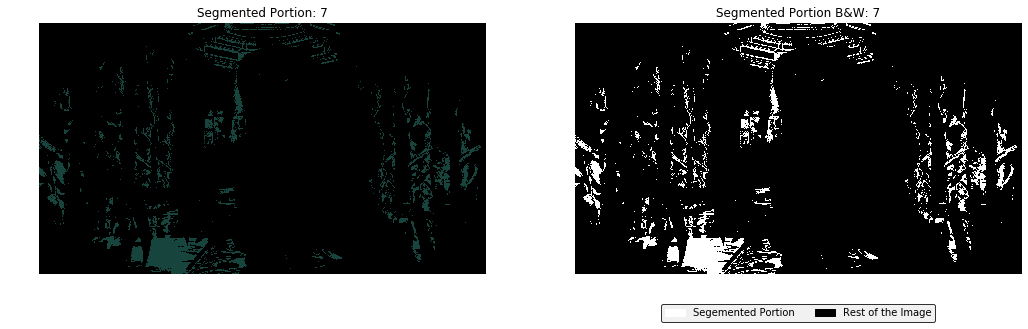

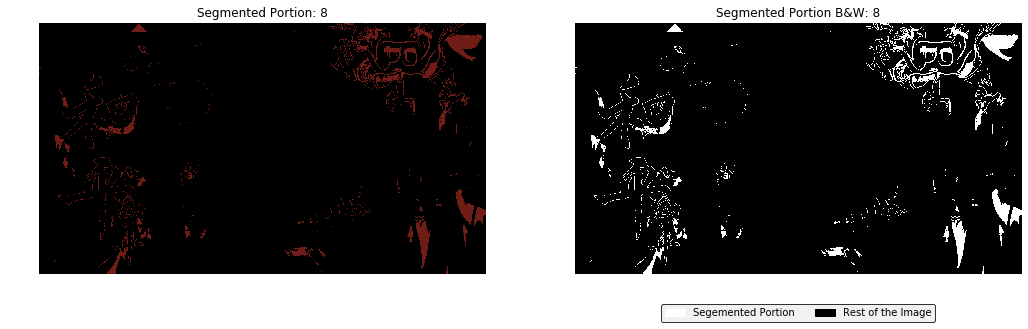

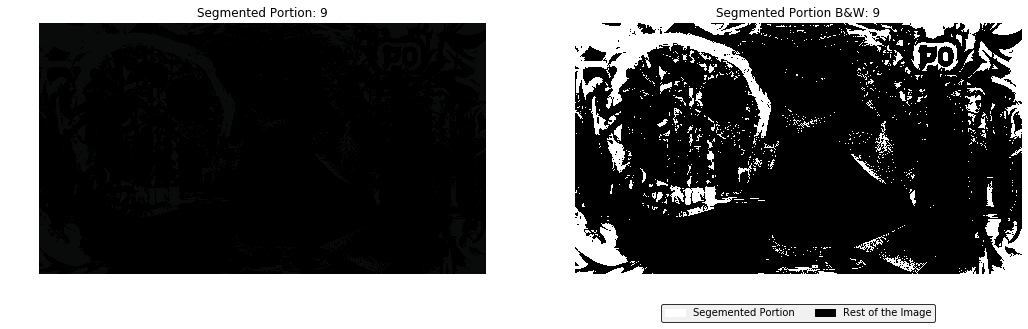

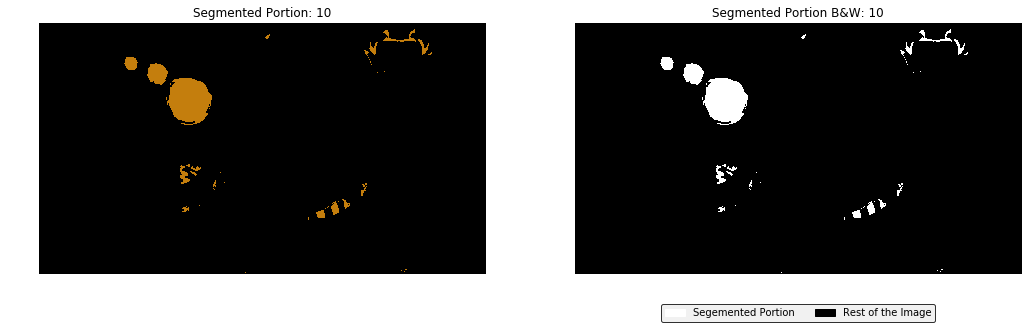

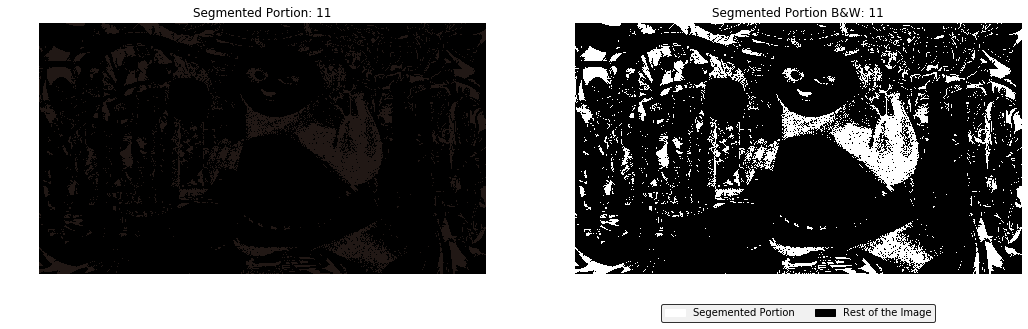

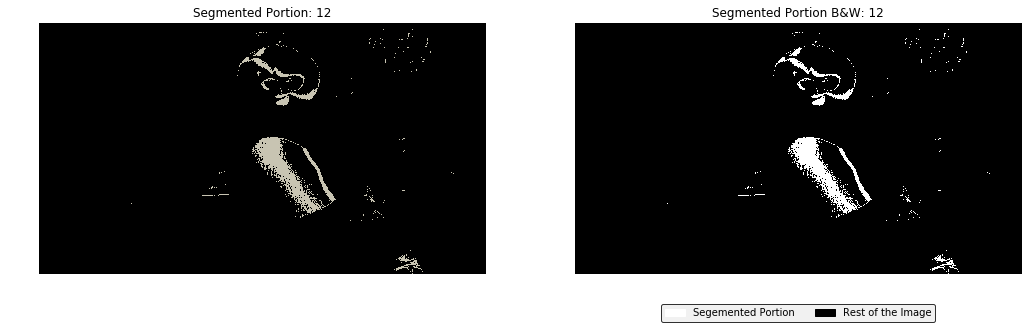

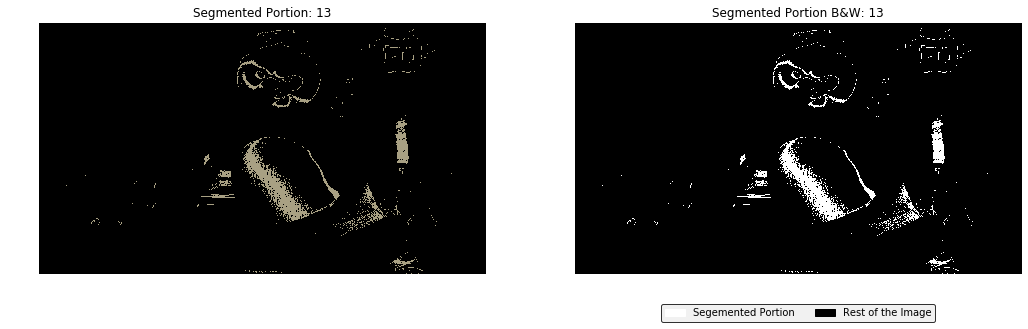

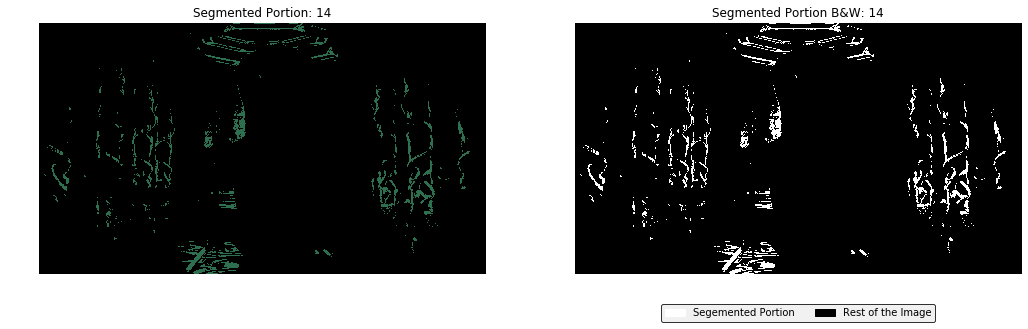

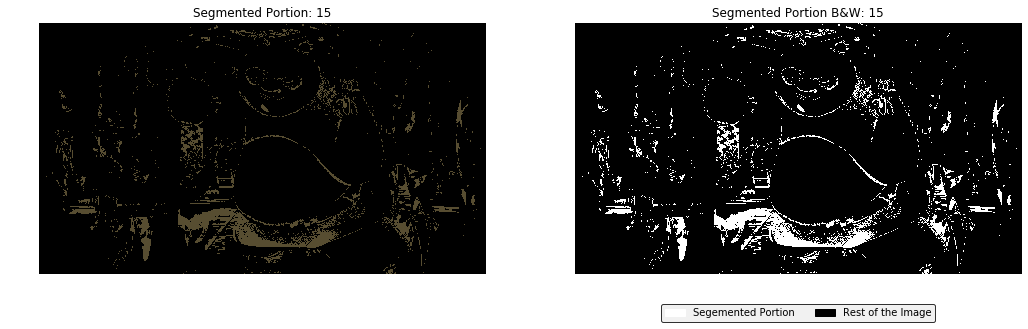

In [37]:
%%time
kmeans_seg_image,kmeans_centers = kmeans_seg(cluster_count=15)

## Summary

####  From above series of plots  if image when varying cluster count was given we can conclude  that:
* As K is small ,it started clustering the shades 
* And, as we move further it start detecting the edges and the contrast between the colours. 
* And with further quantization, color featuring  and  channel inverting with higher value of k  in k means cluster we can even detect the  characters written in the pictures , boundry of each shape in image, can also able to recognize some facial points or shapes.